In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
import datetime as dt

In [11]:
# Find the most recent date in the data set.

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

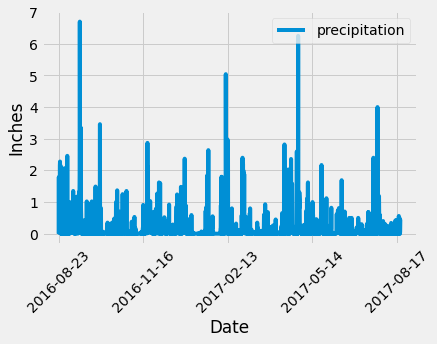

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last = dt.datetime.strptime(last_date[0], '%Y-%m-%d')
one_year_date = dt.date(last.year -1, last.month, last.day)
one_year_date

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_date).all()

result
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(result).set_index('date')
precip_df
# Sort the dataframe by date
precip_sorted = precip_df.sort_values(by='date').rename(columns={'prcp' : 'precipitation'}).dropna()
precip_sorted.head()
# Use Pandas Plotting with Matplotlib to plot the data

precip_sorted.plot(rot=45)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.legend(loc= 'upper right')

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_sorted.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()

total_stations

print(f'there are {total_stations} stations')

there are 9 stations


In [35]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
session.close()